# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

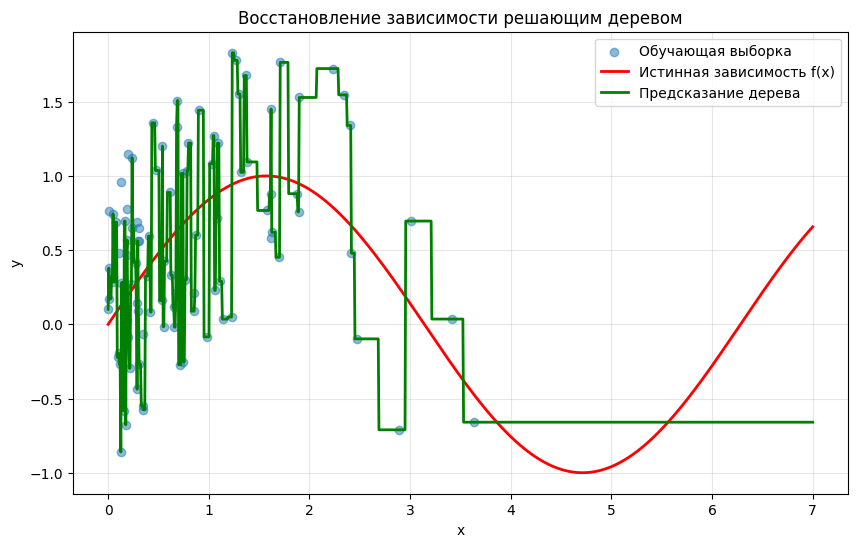

In [4]:
#code here
from sklearn.tree import DecisionTreeRegressor

x = np.random.exponential(scale=1, size=sample_size)
noise = np.random.uniform(low=-1, high=1, size=sample_size)
y = np.sin(x) + noise

reg = DecisionTreeRegressor()
reg.fit(x[:, np.newaxis], y)

y_pred = reg.predict(linspace[:, np.newaxis])

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Обучающая выборка')
plt.plot(linspace, f(linspace), 'r-', linewidth=2, label='Истинная зависимость f(x)')
plt.plot(linspace, y_pred, 'g-', linewidth=2, label='Предсказание дерева')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Восстановление зависимости решающим деревом')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

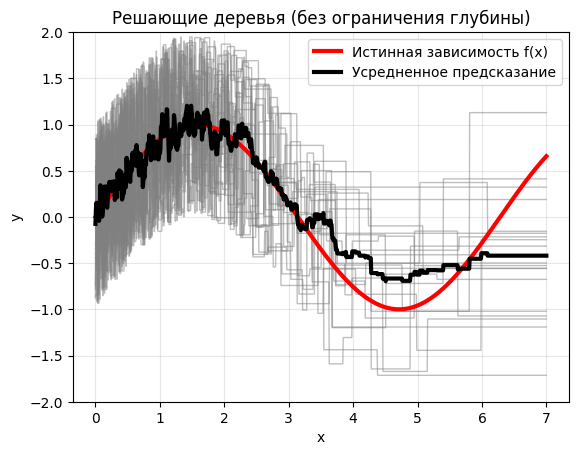

In [6]:
def depth(a):
    #code here
    res = []

    for i in range(samples_num):
        x = np.random.exponential(scale=1, size=sample_size)
        noise = np.random.uniform(low=-1, high=1, size=sample_size)
        y = np.sin(x) + noise

        if a == None:
            reg = DecisionTreeRegressor()
        else:
            reg = DecisionTreeRegressor(max_depth=a)

        reg.fit(x[:, np.newaxis], y)

        y_pred = reg.predict(linspace[:, np.newaxis])
        res.append(y_pred)

        plt.plot(linspace, y_pred, color="gray", alpha=0.5, linewidth=1)

    res = np.array(res)
    mean_pred = np.mean(res, axis=0)
    plt.plot(linspace, f(linspace), color="red", linewidth=3, label='Истинная зависимость f(x)')
    
    plt.plot(linspace, mean_pred, color="black", linewidth=3, label='Усредненное предсказание')
    
    plt.xlabel('x')
    plt.ylabel('y')

    if a == None:
        plt.title(f'Решающие деревья (без ограничения глубины)')
    else:
        plt.title(f'Решающие деревья (максимальная глубина = {a})')

    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-2, 2)  # Ограничиваем по y для лучшей визуализации
    plt.show()
    

depth(None)

__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

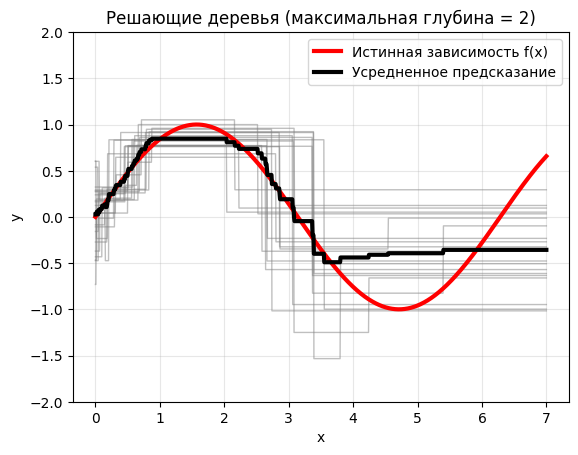

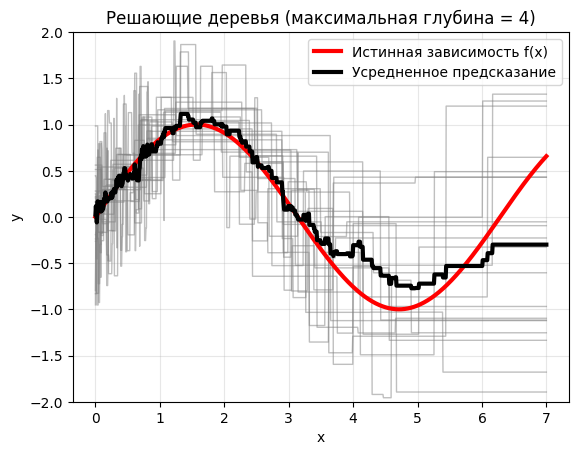

In [7]:
depth(2)
depth(4)

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

*Выводы:*
Смещение решающего дерева близко к нулю только в случае без ограничения на глубину дерева.
Тогда каждое отдельное дерево сильно переобучается (адаптируется к шуму), но при усреднении многих деревьев, обученных на разных выборках, мы получаем оценку, близкую к истинной функции.

В случаях с ограничением глубины 2 и 4 смещение существенно отличается от нуля:

При ограничение глубины 2 получаем большое смещение (сильное недообучение)
При ограничение глубины 4 получаем среднее смещение (частичное недообучение)

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [2]:
import pandas as pd
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [3]:
from importlib import reload
from matplotlib import pyplot as plt
import hw3code
reload(hw3code)

<module 'hw3code' from '/Users/a1234/Desktop/2026_ML/task7_dstree_practice/hw3code.py'>

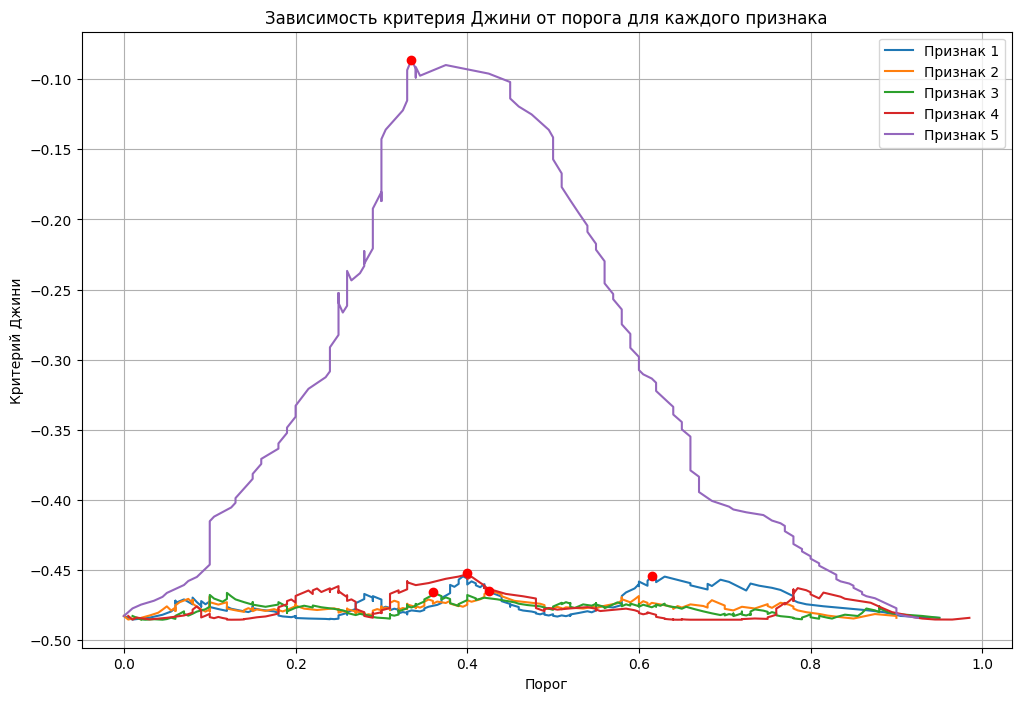

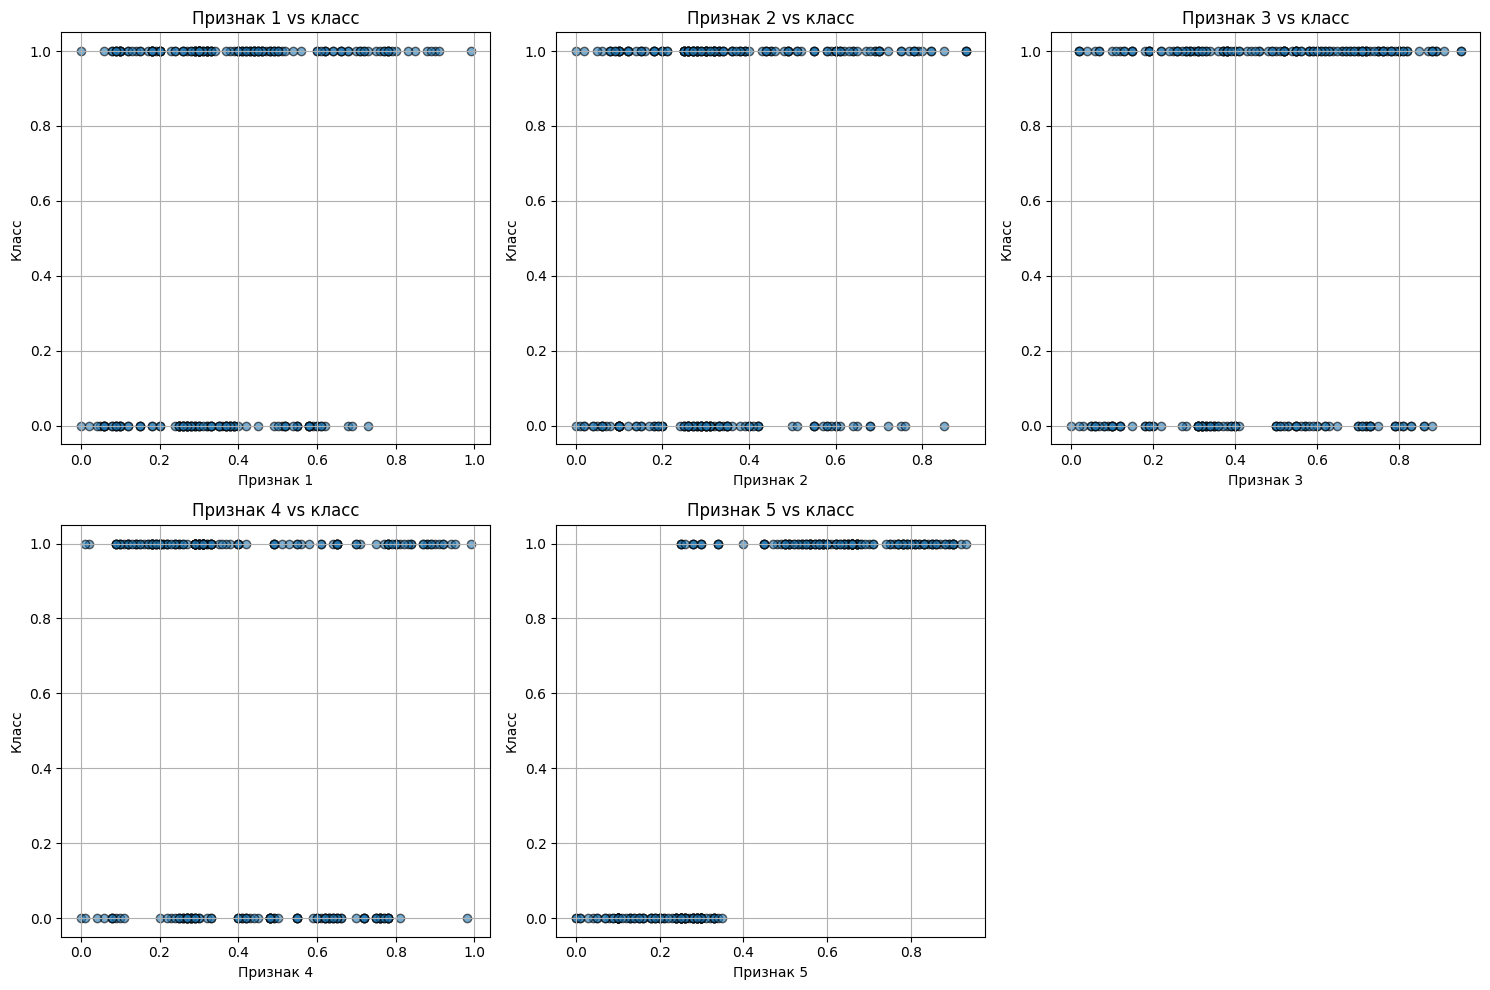

In [4]:
X = data.iloc[:, :5].values   # матрица признаков
y = data.iloc[:, -1].values   # вектор целевых меток

#x, y, bx, by = hw3code.find_best_split

plt.figure(figsize=(12, 8))

for i in range(5):
    # Извлекаем i-й признак
    feature = X[:, i]
    
    # thresholds – все рассмотренные пороги,
    # gini_values – значения критерия Джини для каждого порога,
    # best_th – порог, дающий наименьшее значение Джини,
    # best_gini – минимальное значение Джини.
    thresholds, gini_values, best_th, best_gini = hw3code.find_best_split(feature, y)
    
    # Строим кривую для текущего признака
    plt.plot(thresholds, gini_values, label=f'Признак {i+1}')
    # Отмечаем лучший порог красной точкой
    plt.scatter(best_th, best_gini, color='red', zorder=5)

plt.xlabel('Порог')
plt.ylabel('Критерий Джини')
plt.title('Зависимость критерия Джини от порога для каждого признака')
plt.legend()
plt.grid(True)
plt.show()


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(5):
    ax = axes[i]
    feature = X[:, i]
    ax.scatter(feature, y, alpha=0.6, edgecolors='k')
    ax.set_xlabel(f'Признак {i+1}')
    ax.set_ylabel('Класс')
    ax.set_title(f'Признак {i+1} vs класс')
    ax.grid(True)

# Скрываем пустой subplot (индекс 5)
axes[5].axis('off')
plt.tight_layout()
plt.show()

In [5]:
best_ginis = []
for i in range(5):
    _, _, _, best_gini = hw3code.find_best_split(X[:, i], y)
    best_ginis.append(best_gini)
    print(f'Признак {i+1}: лучший Джини = {best_gini:.4f}')

Признак 1: лучший Джини = -0.4540
Признак 2: лучший Джини = -0.4650
Признак 3: лучший Джини = -0.4660
Признак 4: лучший Джини = -0.4519
Признак 5: лучший Джини = -0.0861


__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

- для деление выборки на два поддерева следует выбирать признак, для которого значение критерия Джини в оптимальной точке ближе всего к 0. Из графика *'Зависимость критерия Джини от порога для каждого признака'* видно, что признак 5 выделяется *резкой кривой*, то есть его кривая Джини имеет глубокий минимум, наиболее близкий к нулю. Именно по нему деление даёт наибольшее снижение нечистоты – он является наилучшим для первого разбиения. 
- на scatter-диаграмме для признака 5 наблюдается чёткое разделение классов: значения признака для класса 0 и класса 1 группируются в разных диапазонах, и существует порог, который хорошо их разделяет. Для остальных признаков точки классов сильно перемешаны, что и объясняет более плохие значения критерия Джини
- кривая зависимости критерия Джини от порога для хорошего признака имеет ярко выраженный глобальный минимум (максимум), который достигает значений, близких к нулю. При этом форма кривой может быть V-образной или содержать резкий провал – это означает, что существует порог, после перехода через который узлы становятся почти чистыми. В идеальном случае минимум равен нулю
- для признаков, по которым деление практически невозможно, кривая Джини остаётся на высоком уровне на всём диапазоне порогов, близком к исходной нечистоте. Минимум выражен слабо или вообще отсутствует – кривая может быть почти горизонтальной или иметь случайные незначительные колебания. Это говорит о том, что ни один порог не позволяет существенно разделить классы, и любые разбиения будут давать примерно одинаково нечистые подмножества.

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [8]:
#code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import hw3code
from importlib import reload

reload(hw3code)

# В датасете нет заголовков, поэтому header=None
data = pd.read_csv('msh.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
# Применяем encoder к каждому столбцу
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])


X = data.iloc[:, 1:].values  # все признаки, начиная со второго столбца
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X.shape[1]
tree = hw3code.DecisionTree(feature_types)
tree.fit(X_train, y_train)

# предсказание на тестовой выборке и вычисление accuracy
y_pred = tree.predict(X_test)
accuracy = np.mean(y_pred == y_test)

print(f'Accuracy на тестовой выборке: {accuracy:.4f}')

Accuracy на тестовой выборке: 0.9988


### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [21]:
reload(hw3code)

data = pd.read_csv('train.csv', nrows=10000)
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Оставляем только числовые признаки (float64 или int64)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

X = data[numeric_cols].drop('target', axis=1, errors='ignore')  # удаляем target из признаков
y = data['target']

# Заполняем пропуски нулями
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


dt = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  # базовый estimator
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # использовать все ядра процессора
)

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_features=None
)

print("Оценка accuracy на обучающей выборке (cv=3):")
for name, model in [('DecisionTree', dt), ('Bagging', bagging), ('RandomForest', rf)]:
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    print(f"{name}: mean = {scores.mean():.4f}, std = {scores.std():.4f}")


print("\nПроверка на тестовой выборке:")
for name, model in [('DecisionTree', dt), ('Bagging', bagging), ('RandomForest', rf)]:
    model.fit(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"{name}: test accuracy = {test_acc:.4f}")

Оценка accuracy на обучающей выборке (cv=3):
DecisionTree: mean = 0.6584, std = 0.0062
Bagging: mean = 0.7586, std = 0.0023
RandomForest: mean = 0.7561, std = 0.0021

Проверка на тестовой выборке:
DecisionTree: test accuracy = 0.6647
Bagging: test accuracy = 0.7537
RandomForest: test accuracy = 0.7570


#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

n_estimators=40, accuracy=0.7487
n_estimators=60, accuracy=0.7537
n_estimators=80, accuracy=0.7500
n_estimators=100, accuracy=0.7507
n_estimators=120, accuracy=0.7507
n_estimators=140, accuracy=0.7530
n_estimators=160, accuracy=0.7527
n_estimators=180, accuracy=0.7503
n_estimators=200, accuracy=0.7510
n_estimators=220, accuracy=0.7500
n_estimators=240, accuracy=0.7510
n_estimators=260, accuracy=0.7507
n_estimators=280, accuracy=0.7503
n_estimators=300, accuracy=0.7503
n_estimators=320, accuracy=0.7520
n_estimators=340, accuracy=0.7517
n_estimators=360, accuracy=0.7520
n_estimators=380, accuracy=0.7530
n_estimators=400, accuracy=0.7513
n_estimators=420, accuracy=0.7517
n_estimators=440, accuracy=0.7513
n_estimators=460, accuracy=0.7533
n_estimators=480, accuracy=0.7517
n_estimators=500, accuracy=0.7517
n_estimators=520, accuracy=0.7527
n_estimators=540, accuracy=0.7527
n_estimators=560, accuracy=0.7523
n_estimators=580, accuracy=0.7513
n_estimators=600, accuracy=0.7510
n_estimators=620,

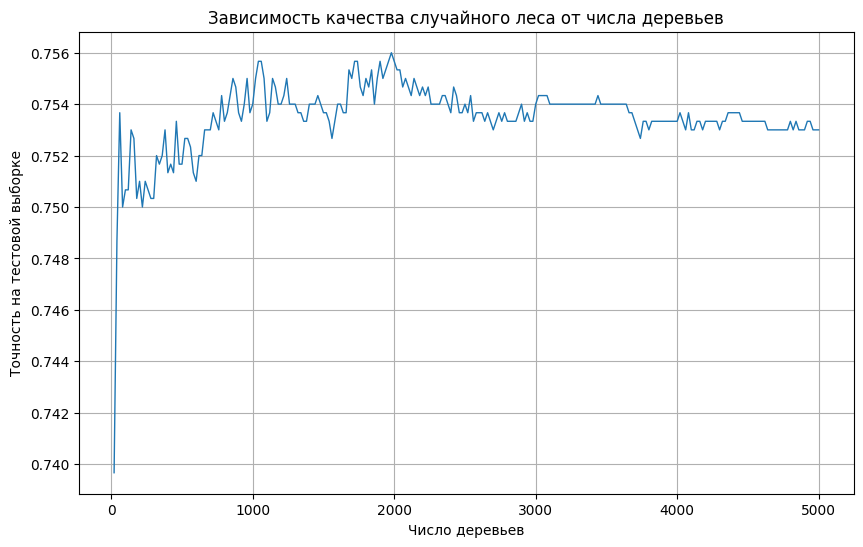

In [28]:
#code here
from sklearn.metrics import accuracy_score
max_trees = 5000
step = 20
n_estimators_list = list(range(20, max_trees + 1, step))

rf = RandomForestClassifier(warm_start=True, random_state=42, n_estimators=20, n_jobs=-1)
rf.fit(X_train, y_train)
accuracies = [accuracy_score(y_test, rf.predict(X_test))]

for n in n_estimators_list[1:]:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    accuracies.append(acc)
    print(f'n_estimators={n}, accuracy={acc:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, linewidth=1)
plt.xlabel('Число деревьев')
plt.ylabel('Точность на тестовой выборке')
plt.title('Зависимость качества случайного леса от числа деревьев')
plt.grid(True)
plt.show()

Кривая не имеет тенденции к снижению после достижения максимума. Случайный лес не переобучается с ростом числа деревьев. Это объясняется тем, что каждое новое дерево строится независимо и усреднение большого количества деревьев уменьшает дисперсию итоговой модели, не увеличивая смещение. Таким образом, добавление деревьев после достижения плато не ухудшает обобщающую способность, а лишь стабилизирует предсказания.